# 3.4 パーセプトロンによる二値分類

### パーセプトロンを実装する

sample/chap03/03_04/negaposi.csv が存在しないので、p.123のグラフを見てデータを作成した。<a href="./negaposi.csv">negaposi.csv</a>

In [1]:
# p.122
# データの読み込み
import numpy as np
import os

#DIR="../local/sample/chap03/03_04/"
DIR="."
data_path = os.path.join(DIR, 'negaposi.csv')

data =  np.loadtxt(fname=data_path,
                   dtype='int', 
                   delimiter=',',
                   skiprows=1     # 1行目はタイトルなので読み飛ばす
                  )
x = data[:, 0:2] # x, y
t = data[:, 2]   # label

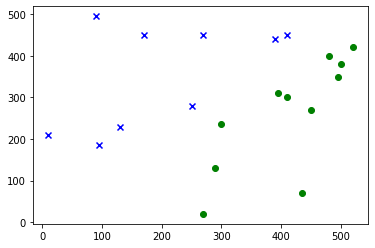

In [2]:
# p.122 改
# データをグラフで描画する
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x[t==1, 0], x[t==1, 1], marker='o',color='green')
ax.scatter(x[t == -1, 0], x[t == -1, 1], marker='x', color='blue')

plt.show()

### パーセプトロンを実装する

In [3]:
# パーセプトロン(分類関数)の定義
# p.123
def classify(x, w):
    '''
    分類関数
    
    Parameters:
    x(ndarray): x1, x2 のデータ
    w(ndarray): 重み w1, w2 の値
    
    Returns:
    (float) 更新後の重み w1, w2
    '''
    
    if np.dot(w, x) >= 0:
        return 1
    else:
        return -1

In [4]:
# 重みの更新式の実装
# p.124
def learn_weights(x, t):
    '''
    更新式で重みを学習する
    
    Parameers:
    x(ndarray): x1, x2のデータ
    t(ndarray): t 正解ラベル
    
    Returns:
    (int) 更新後の重み w
    '''
    
    np.random.seed(seed=1)
    w = np.random.rand(2)
    loop = 5
    count = 0
    
    for i in range(loop):
        for element_x, element_t in zip(x, t):
            if classify(element_x, w) != element_t:
                w = w + element_t * element_x
                print('updated w = ', w)
        count += 1
        print(f'{count:d} 回目: w={w}')

    return w

In [5]:
# 訓練データで学習を行う
# p.125

w = learn_weights(x, t)

updated w =  [  -9.582978   -209.27967551]
updated w =  [ 260.417022   -189.27967551]
updated w =  [-129.582978   -629.27967551]
updated w =  [ 265.417022   -319.27967551]
updated w =  [745.417022    80.72032449]
1 回目: w=[745.417022    80.72032449]
updated w =  [ 735.417022   -129.27967551]
updated w =  [ 640.417022   -314.27967551]
updated w =  [ 510.417022   -544.27967551]
2 回目: w=[ 510.417022   -544.27967551]
3 回目: w=[ 510.417022   -544.27967551]
4 回目: w=[ 510.417022   -544.27967551]
5 回目: w=[ 510.417022   -544.27967551]


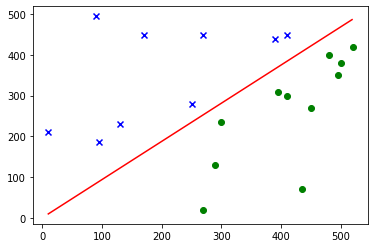

In [6]:
# 訓練データと区分線を描画する
# p.126 改

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6,4))

ax.scatter(x[t==1, 0], x[t==1, 1], marker='o',color='green')
ax.scatter(x[t == -1, 0], x[t == -1, 1], marker='x', color='blue')

min_x = min(x[:, 0])
max_x = max(x[:, 0])
x1 = np.arange(min_x, max_x)
ax.plot(x1, -w[0] / w[1] * x1, color='red')

plt.show()

In [7]:
# 分類してみる
test_x = [500, 100]

print(classify(test_x, w))

1


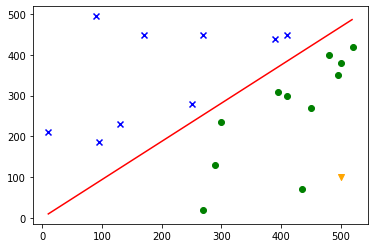

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6,4))

ax.scatter(x[t==1, 0], x[t==1, 1], marker='o',color='green')         # positive data 緑の丸
ax.scatter(x[t == -1, 0], x[t == -1, 1], marker='x', color='blue')   # negative data 青の×

min_x = min(x[:, 0])
max_x = max(x[:, 0])
x1 = np.arange(min_x, max_x)
ax.plot(x1, -w[0] / w[1] * x1, color='red')                  # 分類線は赤い実践

ax.scatter(test_x[0], test_x[1], marker='v', color='orange') # 上で試した点 test_x = [500, 100] を黄色い三角で描画する

plt.show()